In [61]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
data = genfromtxt('admit.csv', delimiter=',')

In [62]:
data #exam1 exam2 admission_status(admit)

array([[ 34.62365962,  78.02469282,   0.        ],
       [ 30.28671077,  43.89499752,   0.        ],
       [ 35.84740877,  72.90219803,   0.        ],
       [ 60.18259939,  86.3085521 ,   1.        ],
       [ 79.03273605,  75.34437644,   1.        ],
       [ 45.08327748,  56.31637178,   0.        ],
       [ 61.10666454,  96.51142588,   1.        ],
       [ 75.02474557,  46.55401354,   1.        ],
       [ 76.0987867 ,  87.42056972,   1.        ],
       [ 84.43281996,  43.53339331,   1.        ],
       [ 95.86155507,  38.22527806,   0.        ],
       [ 75.01365839,  30.60326323,   0.        ],
       [ 82.30705337,  76.4819633 ,   1.        ],
       [ 69.36458876,  97.71869196,   1.        ],
       [ 39.53833914,  76.03681085,   0.        ],
       [ 53.97105215,  89.20735014,   1.        ],
       [ 69.07014406,  52.74046973,   1.        ],
       [ 67.94685548,  46.67857411,   0.        ],
       [ 70.66150955,  92.92713789,   1.        ],
       [ 76.97878373,  47.57596

In [63]:
admit_original=[]
ex0_original=[]
ex1_original=[]
ex2_original=[]
for i in range(0,len(data)):
    admit_original.append(data[i,2])
    ex1_original.append(data[i,0])
    ex2_original.append(data[i,1])
    ex0_original.append(1)

In [64]:
Y=np.array(admit_original)   #Create Y matrix
X1=np.array([ex0_original, ex1_original, ex2_original]) #X transpose matrix
X=np.transpose(X1)  #X matrix

In [65]:
B=np.matmul(np.matmul(np.linalg.inv(np.matmul(X1,X)),X1),Y)

In [66]:
B

array([-1.29749694,  0.01484087,  0.01394217])

In [67]:
E= Y-np.matmul(X,B)
error=0
for i in range(0, len(data)-1):
    error+=E[i]**2
print("SSE value for the data is: ",(float)(error/(len(data)-1)))

SSE value for the data is:  0.09541146422779156


In [68]:
admit_predict=[]
for i in range(0,len(data)):
    admit_predict.append(B[0]+ex1_original[i]*B[1]+ex2_original[i]*B[2])

In [69]:
eqn=[]
eqn=1/(1+np.exp(-np.array(admit_predict)))
eqn

array([ 0.57546456,  0.44126639,  0.56240415,  0.68975928,  0.71623914,
        0.53910768,  0.72211124,  0.61419964,  0.74091088,  0.63703311,
        0.658837  ,  0.56031667,  0.72915437,  0.74919904,  0.58647326,
        0.67857372,  0.61369744,  0.58945057,  0.74015759,  0.62439563,
        0.57435054,  0.72127019,  0.53336028,  0.45676247,  0.69436141,
        0.64610836,  0.62656448,  0.65143835,  0.5795184 ,  0.54594485,
        0.65215505,  0.68252702,  0.58806387,  0.60896108,  0.57245798,
        0.56003665,  0.64205472,  0.68632198,  0.59677964,  0.56434016,
        0.67540723,  0.53016203,  0.73464102,  0.62039712,  0.52472091,
        0.58705044,  0.69645125,  0.79619709,  0.72569501,  0.78550263,
        0.71564262,  0.73618885,  0.65729316,  0.51422947,  0.5357345 ,
        0.56765241,  0.75245142,  0.62687381,  0.68523268,  0.70304461,
        0.73441117,  0.47047139,  0.52117461,  0.46009407,  0.57245576,
        0.56543211,  0.65988479,  0.53846075,  0.76462763,  0.63

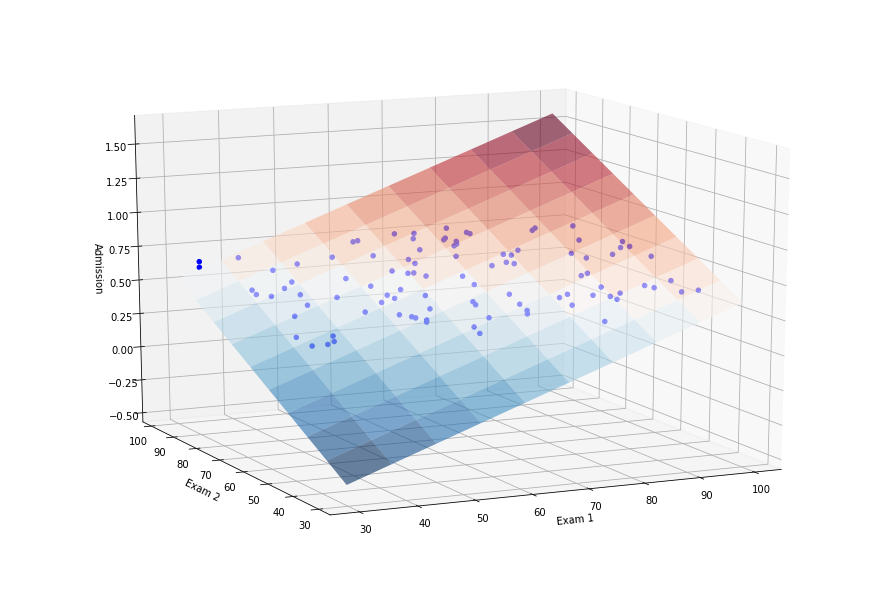

In [70]:
from mpl_toolkits.mplot3d import Axes3D
xx1, xx2 = np.meshgrid(np.linspace(min(ex1_original),max(ex1_original), 10), np.linspace(min(ex2_original), max(ex2_original), 10))
# plot the hyperplane by evaluating the parameters on the grid
Z = B[0]+ B[1]* xx1 + B[2] * xx2 

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

ax.set_xlabel('Exam 1')
ax.set_ylabel('Exam 2')
ax.set_zlabel('Admission')

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
#ax.scatter(ex1_original, ex2_original, admit_predict,'o', color='red', alpha=1.0, facecolor='orange')
ax.scatter(ex1_original, ex2_original, eqn,'o', color='blue', alpha=1.0, facecolor='blue')
plt.show()